In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/User/Downloads/archive/WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
print(f"Shape: {df.shape}")

Shape: (1143, 13)


In [4]:
df.drop('Id', axis=1, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB
None


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


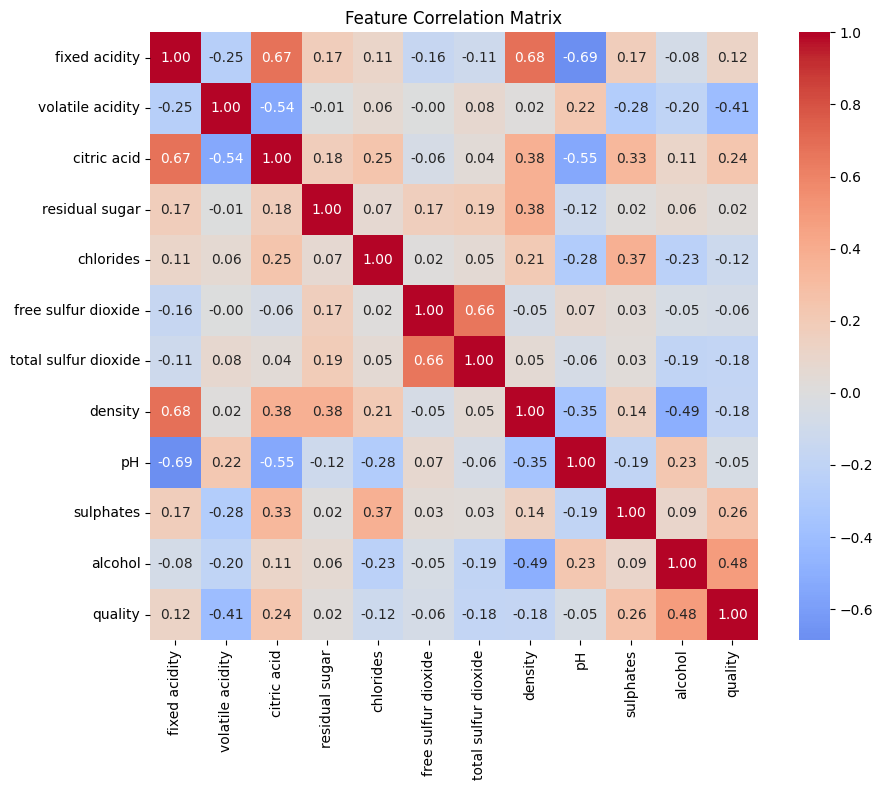

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), fmt='.2f', annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

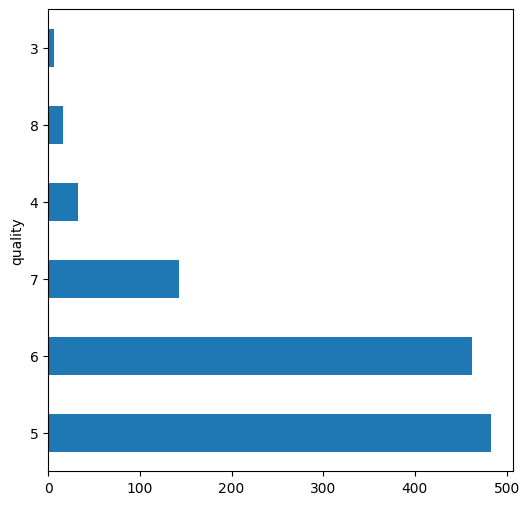

In [7]:
plt.figure(figsize=(6, 6))
df['quality'].value_counts().plot(kind='barh')
plt.show()

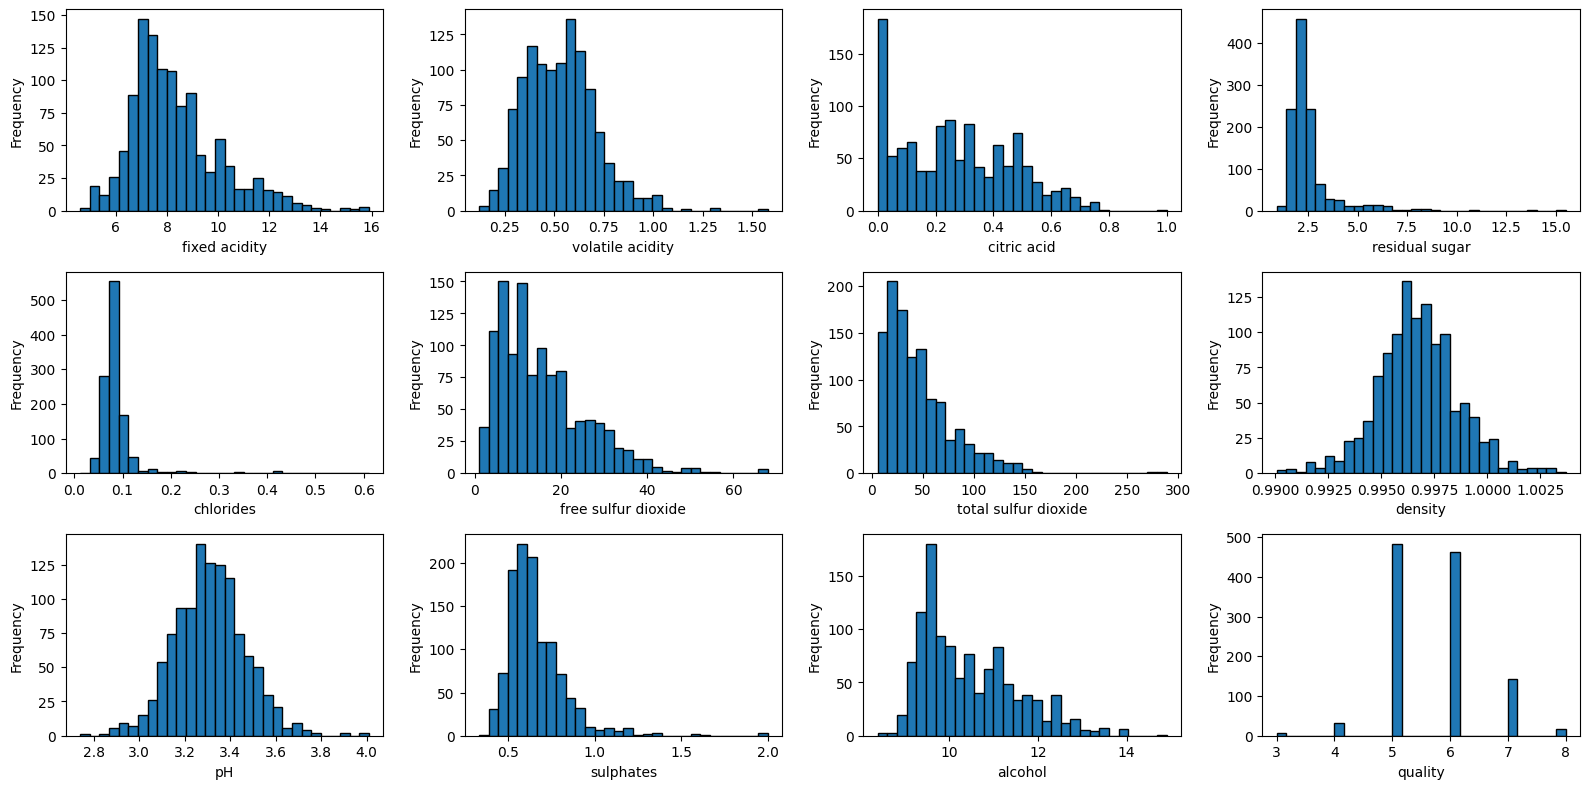

In [8]:
# Scatter plots of features vs target
fig, axes = plt.subplots(3, 4, figsize=(16, 8))
axes = axes.flatten()
for idx, feature in enumerate(df.columns):
    axes[idx].hist(df[feature], bins=30, edgecolor='black')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**Split Features and Target**

In [9]:
x = df.drop('quality', axis=1)
y = df['quality']

print(f"Features shape: {x.shape}")
print(f"Target shape: {y.shape}")
print(f'Class distribution: {y.value_counts().to_dict()}')

Features shape: (1143, 11)
Target shape: (1143,)
Class distribution: {5: 483, 6: 462, 7: 143, 4: 33, 8: 16, 3: 6}


**Train-Test split**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)

print(f"Training set size: {x_train.shape[0]}")
print(f"Test set size: {x_test.shape[0]}")

print(f"\nTraining class distribution:\n", y_train.value_counts(normalize=True))
print(f"\nTest class distribution:\n", y_test.value_counts(normalize=True))

Training set size: 914
Test set size: 229

Training class distribution:
 quality
5    0.422319
6    0.404814
7    0.124726
4    0.028446
8    0.014223
3    0.005470
Name: proportion, dtype: float64

Test class distribution:
 quality
5    0.423581
6    0.401747
7    0.126638
4    0.030568
8    0.013100
3    0.004367
Name: proportion, dtype: float64


In [11]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print(f"Scaled training shape: {x_train_scaled.shape}")

Scaled training shape: (914, 11)


**Train Basic Models**

In [ ]:
models = {
    'Decision Tree' : DecisionTreeClassifier(random_state=42),
    'SVM' : SVC(probability=True, random_state=42),
    'KNN' : KNeighborsClassifier(n_neighbors=100),
    'Logistic Regression' : LogisticRegression(random_state=42)
}
results = {}

for name, model in models.items():
    print(f"Training {name}")

    if name in ['Logistic Regression', 'SVM']:
        x_train_model = x_train_scaled
        x_test_model = x_test_scaled
    else:
        x_train_model = x_train
        x_test_model = x_test
    
    model.fit(x_train_model, y_train)
    
    y_pred = model.predict(x_test_model)
    y_pred_proba = model.predict_proba(x_test_model)[:, 1] if hasattr(model, 'predict_proba') else None
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'model' : model,
        'accuracy' : accuracy,
        'predictions' : y_pred,
        'probabilities' : y_pred_proba
    }
    
    print(f"Accuracy: {accuracy:.3f}")
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred))

Training Decision Tree
Accuracy: 0.629

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.17      0.14      0.15         7
           5       0.68      0.71      0.70        97
           6       0.63      0.61      0.62        92
           7       0.58      0.62      0.60        29
           8       0.00      0.00      0.00         3

    accuracy                           0.63       229
   macro avg       0.34      0.35      0.34       229
weighted avg       0.62      0.63      0.62       229

Training SVM
Accuracy: 0.668

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.73      0.80      0.76        97
           6       0.61      0.72      0.66        92
           7       0.69      0.31      0.43        29
           8    

**Train Ensemble Models**

In [14]:
models = {
    'Random Forest' : RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoost' : AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42),
    'Gradient Boost' : GradientBoostingClassifier(n_estimators=100, random_state=42),
    'LGboost' : LGBMClassifier(n_estimators=100, random_state=42)
}
ensemble_results = {}

for name, model in models.items():
    print(f"Training {name}")
    
    model.fit(x_train_scaled, y_train)
    
    y_pred = model.predict(x_test_scaled)
    y_pred_proba = model.predict_proba(x_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    accuracy = accuracy_score(y_test, y_pred)
    ensemble_results[name] = {
        'model' : model,
        'accuracy' : accuracy,
        'predictions' : y_pred,
        'probabilities' : y_pred_proba
    }
    
    print(f"Accuracy: {accuracy:.3f}")
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred))

Training Random Forest
Accuracy: 0.712

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.73      0.86      0.79        97
           6       0.69      0.72      0.70        92
           7       0.70      0.48      0.57        29
           8       0.00      0.00      0.00         3

    accuracy                           0.71       229
   macro avg       0.35      0.34      0.34       229
weighted avg       0.68      0.71      0.69       229

Training AdaBoost
Accuracy: 0.493

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.05      0.14      0.07         7
           5       0.68      0.49      0.57        97
           6       0.51      0.52      0.51        92
           7       0.39      0.55      0.46        29
           